Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content
/content/drive
/content/drive/My Drive/SnehalDevarshi/AUTOENCODER/4


Using TensorFlow backend.


['sample_submission.csv', 'train.csv', 'test.csv', 'GCM_without_head.csv', 'GCM_with_head.csv']
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11370)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6000)              68226000  
_________________________________________________________________
dense_2 (Dense)              (None, 3000)              18003000  
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              4501500   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              1501500   
_____________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 178 samples, validate on 20 samples
Epoch 1/15
178/178 [==============================] - 16s 90ms/step - loss: 0.1108 - val_loss: 0.0390
Epoch 2/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0401 - val_loss: 0.0391
Epoch 3/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0402 - val_loss: 0.0392
Epoch 4/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 5/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 6/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0402 - val_loss: 0.0392
Epoch 7/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0402 - val_loss: 0.0392
Epoch 8/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 9/15
178/178 [==============================] - 14s 79ms/step - loss: 0.0403 - val_loss: 0.0392
Epoch 10/15
178/178 [================

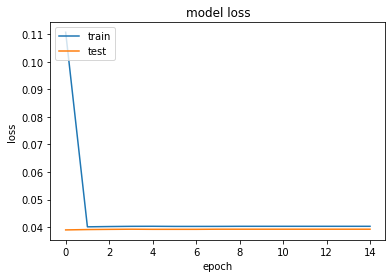

(198, 1001)


In [0]:
#@title
from google.colab import drive
drive.mount('/content/drive/')
!pwd
import os
os.chdir('/content/drive/')
!pwd
import os
os.chdir('/content/drive/My Drive/SnehalDevarshi/AUTOENCODER/4/')
!pwd


import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt


print(os.listdir("data"))

data = pd.read_csv('data/GCM_with_head.csv')
 
 

'''for i in range(0,154):
  test.drop([i],inplace = True)
'''


target = data['class']
data.drop(['class'], axis=1, inplace=True)
 

 
data_scaled = minmax_scale(data, axis = 0)
 
 

# define the number of features
ncol = data_scaled.shape[1]

ncol

#X_train, X_test, Y_train, Y_test = train_test_split(train, target,train_size = 0.9, random_state = seed(2017))
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled, target,train_size = 0.9, random_state = seed(2017))

### Define the encoder dimension
encoding_dim = 1000

input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(6000, activation = 'relu')(input_dim)
encoded2 = Dense(3000, activation = 'relu')(encoded1)
encoded3 = Dense(1500, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)

# Decoder Layers
decoded1 = Dense(1500, activation = 'relu')(encoded4)
decoded2 = Dense(3000, activation = 'relu')(decoded1)
decoded3 = Dense(6000, activation = 'relu')(decoded2)
decoded4 = Dense(ncol, activation = 'sigmoid')(decoded3)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded4)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mse')

autoencoder.summary()

#autoencoder.fit(X_train, X_train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))
#history=autoencoder.fit(X_train, X_train,nb_epoch = 5, batch_size = 5, shuffle = False, validation_data = (X_test, X_test))
history=autoencoder.fit(X_train, X_train,nb_epoch = 15 , shuffle = False, validation_data = (X_test, X_test))
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

'''
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

encoder = Model(inputs = input_dim, outputs = encoded4)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(data))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train['class'] = target

print(encoded_train.shape)
encoded_train.head()


encoded_train.to_csv('data_ecoded.csv', index=False)
 



Train on 144 samples, validate on 54 samples
Epoch 1/25
144/144 [==============================] - 1s 7ms/step - loss: 2.2358 - accuracy: 0.2569 - val_loss: 1.9704 - val_accuracy: 0.3333
Epoch 2/25
144/144 [==============================] - 1s 6ms/step - loss: 1.5596 - accuracy: 0.4514 - val_loss: 1.8428 - val_accuracy: 0.3704
Epoch 3/25
144/144 [==============================] - 1s 6ms/step - loss: 1.2276 - accuracy: 0.6736 - val_loss: 1.5110 - val_accuracy: 0.5000
Epoch 4/25
144/144 [==============================] - 1s 6ms/step - loss: 0.9334 - accuracy: 0.7361 - val_loss: 1.3545 - val_accuracy: 0.5000
Epoch 5/25
144/144 [==============================] - 1s 6ms/step - loss: 0.8145 - accuracy: 0.7083 - val_loss: 1.2727 - val_accuracy: 0.6111
Epoch 6/25
144/144 [==============================] - 1s 6ms/step - loss: 0.5709 - accuracy: 0.8750 - val_loss: 1.1963 - val_accuracy: 0.6296
Epoch 7/25
144/144 [==============================] - 1s 6ms/step - loss: 0.4452 - accuracy: 0.8889 - v

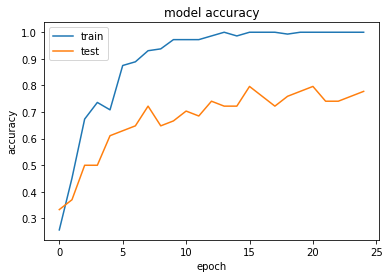

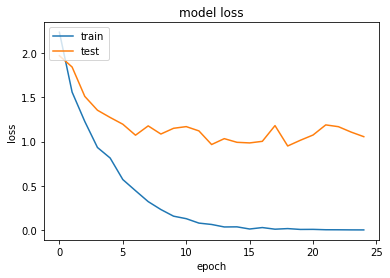


# Evaluate on test data
54/54 [==============================] - 0s 844us/step
test loss, test acc: [1.0556991718433522, 0.7777777910232544]
Training Accuracy= 1.0
Testing Accuracy= 0.7777777777777778
Confusion Matrix:
 [[1 0 1 0 0 0 0 0 0 0 1 1 0 0]
 [1 4 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 3 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.80      0.67      0.73         6
           2       0.75      0.75      0.75         4
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         6
           5       

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import random
random.seed(30)
data = pd.read_csv("data_encoded.csv")

X = data.iloc[:,0:-1]  #independent columns

#X = dataset[1:,0:-1].astype(float)
#y = data.iloc[:,-1]    #target column i.e price range
Y = data.iloc[:,-1]
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=1000)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(11370,'Score'))  #print 10 best features
#temp=pd.concat([dfcolumns.T,dfscores.T],axis=1)

for i in range(0,len(featureScores)):
  #print(featureScores.iloc[i,-1])
  if featureScores.iloc[i,-1] <=4.5:
    X.drop(featureScores.iloc[i,0],inplace = True,axis=1)

z,m=X.shape
encoding_dim=m


X_train=X.iloc[0:144,:]
Y_train=Y.iloc[0:144]
X_test=X.iloc[144:,:]
Y_test=Y.iloc[144:]
 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
#print("encoded_Y",encoded_Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
#print("dummy_y",dummy_y)

# encode class values as integers
encoder1 = LabelEncoder()
encoder1.fit(Y_test)
encoded_Y1 = encoder.transform(Y_test)
#print("encoded_Y",encoded_Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y1 = np_utils.to_categorical(encoded_Y1)

# create model
model = Sequential()
model.add(Dense(2000, input_dim=encoding_dim, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
#model.add(Dense(14, activation='sigmoid'))
model.add(Dense(14, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='sparse_categorical', optimizer='adam', metrics=['sparse_categorical_accuracy'])
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
#history = model.fit(X,dummy_y , validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X,dummy_y , epochs=15, batch_size=5, verbose=1)
#history = model.fit(X_train,dummy_y , validation_data=(X_test,dummy_y1), epochs=50, batch_size=5, verbose=1)
history = model.fit(X_train,dummy_y , validation_data=(X_test,dummy_y1), epochs=25,  verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=1)
#kfold = KFold(n_splits=2, shuffle=True)
#print(estimator.sk_params)
#print(estimator.check_params)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test,dummy_y1)
print('test loss, test acc:', results)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
training_target=Y_train
test_target=Y_test
TrainAccuracy=accuracy_score(Y_train, model.predict(X_train).argmax(axis=1).T)

TestAccuracy=accuracy_score(Y_test, model.predict(X_test).argmax(axis=1).T)
ConfusionMatrix=confusion_matrix(test_target, model.predict(X_test).argmax(axis=1).T)
print("Training Accuracy=",TrainAccuracy)
print("Testing Accuracy=",TestAccuracy)
print("Confusion Matrix:\n",ConfusionMatrix)
print(classification_report(test_target, model.predict(X_test).argmax(axis=1).T))





```
# This is formatted as code
```

Decision tree classifier – Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. 


In [0]:
#@title
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 



 

# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 25).fit(X_train, Y_train) 
dtree_predictions_test = dtree_model.predict(X_test)
dtree_predictions_train = dtree_model.predict(X_train) 
training_target=Y_train
test_target=Y_test
# creating a confusion matrix 
cm = confusion_matrix(Y_test, dtree_predictions_test)
#print(Y_train.shape)
#print(dtree_predictions_train.shape)
TrainAccuracy=accuracy_score(Y_train, dtree_predictions_train)

TestAccuracy=accuracy_score(Y_test,dtree_predictions_test)
ConfusionMatrix=confusion_matrix(test_target, dtree_predictions_test)
print("Training Accuracy=",TrainAccuracy)
print("Testing Accuracy=",TestAccuracy)
print("Confusion Matrix:\n",ConfusionMatrix)
print(classification_report(test_target, dtree_predictions_test))




Training Accuracy= 1.0
Testing Accuracy= 0.46296296296296297
Confusion Matrix:
 [[0 0 0 0 0 0 0 1 0 0 2 1 0 0]
 [0 1 0 0 0 3 0 0 0 1 0 1 0 0]
 [0 0 3 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 2 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 4 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 2 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.17      0.22         6
           2       0.75      0.75      0.75         4
           3       0.67      1.00      0.80         4
           4       1.00      0.33      0.50         6
           5       0.12      0.33      0.18         3
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         

SVM (Support vector machine) classifier –

SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear).

In [0]:
#@title
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, Y_train) 
svm_predictions_test = svm_model_linear.predict(X_test) 
svm_predictions_train = svm_model_linear.predict(X_train)   
# model accuracy for X_test   
accuracy_test = svm_model_linear.score(X_test, Y_test) 
accuracy_train = svm_model_linear.score(X_train, Y_train) 
training_target=Y_train
test_target=Y_test 
# creating a confusion matrix 
cm = confusion_matrix(Y_test, svm_predictions_test) 

TrainAccuracy=accuracy_score(Y_train, svm_predictions_train)

TestAccuracy=accuracy_score(Y_test,svm_predictions_test)
ConfusionMatrix=confusion_matrix(test_target, svm_predictions_test)
print("Training Accuracy=",TrainAccuracy)
print("Testing Accuracy=",TestAccuracy)
print("Confusion Matrix:\n",ConfusionMatrix)
print(classification_report(test_target, svm_predictions_test))


Training Accuracy= 0.9513888888888888
Testing Accuracy= 0.6481481481481481
Confusion Matrix:
 [[3 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 1 0 1 0 0 0 0 0 1]
 [0 1 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 5 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.27      0.75      0.40         4
           1       0.75      0.50      0.60         6
           2       0.50      0.50      0.50         4
           3       0.57      1.00      0.73         4
           4       1.00      0.83      0.91         6
           5       0.50      0.33      0.40         3
           6       0.50      0.50      0.50         2
           7       0.00      0.00     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN (k-nearest neighbours) classifier – KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [0]:
#@title
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, Y_train) 
  
# accuracy on X_train 
accuracy_train = knn.score(X_train, Y_train) 
print (accuracy_train) 
  
# creating a confusion matrix 
knn_predictions_test = knn.predict(X_test)  
knn_predictions_train = knn.predict(X_train)
# accuracy on X_test 
accuracy_test = knn.score(X_test, Y_test) 
print (accuracy_test) 
  
training_target=Y_train
test_target=Y_test 
# creating a confusion matrix 
cm = confusion_matrix(Y_test, svm_predictions_test) 

TrainAccuracy=accuracy_score(Y_train, knn_predictions_train)

TestAccuracy=accuracy_score(Y_test,knn_predictions_test)
ConfusionMatrix=confusion_matrix(test_target, knn_predictions_test)
print("Training Accuracy=",TrainAccuracy)
print("Testing Accuracy=",TestAccuracy)
print("Confusion Matrix:\n",ConfusionMatrix)
print(classification_report(test_target, knn_predictions_test))  

 

0.7777777777777778
0.5370370370370371
Training Accuracy= 0.7777777777777778
Testing Accuracy= 0.5370370370370371
Confusion Matrix:
 [[2 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [1 3 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 5 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       0.18      0.50      0.27         4
           1       0.75      0.50      0.60         6
           2       1.00      0.50      0.67         4
           3       0.57      1.00      0.73         4
           4       0.83      0.83      0.83         6
           5       0.29      0.67      0.40         3
           6       0.50      0.50      0.50         2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# training a Naive Bayes classifier 


In [0]:
#@title
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions_test = gnb.predict(X_test) 
gnb_predictions_train = gnb.predict(X_train) 
  
# accuracy on X_test 
accuracy_test = gnb.score(X_test, Y_test) 
print (accuracy_test) 
# accuracy on X_train 
accuracy_train = gnb.score(X_train, Y_train) 
print (accuracy_train) 




# creating a confusion matrix 
cm = confusion_matrix(Y_test, gnb_predictions_test) 

training_target=Y_train
test_target=Y_test 
# creating a confusion matrix 
cm = confusion_matrix(Y_test, gnb_predictions_test) 

TrainAccuracy=accuracy_score(Y_train, gnb_predictions_train)

TestAccuracy=accuracy_score(Y_test,gnb_predictions_test)
ConfusionMatrix=confusion_matrix(test_target, gnb_predictions_test)
print("Training Accuracy=",TrainAccuracy)
print("Testing Accuracy=",TestAccuracy)
print("Confusion Matrix:\n",ConfusionMatrix)
print(classification_report(test_target, gnb_predictions_test)) 

0.5370370370370371
1.0
Training Accuracy= 1.0
Testing Accuracy= 0.5370370370370371
Confusion Matrix:
 [[0 0 0 0 0 0 1 1 0 0 0 2 0 0]
 [0 2 0 0 0 0 0 1 1 0 0 1 0 1]
 [0 1 1 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.33      0.40         6
           2       1.00      0.25      0.40         4
           3       0.80      1.00      0.89         4
           4       0.83      0.83      0.83         6
           5       0.00      0.00      0.00         3
           6       0.40      1.00      0.57         2
           7       0.33      1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from google.colab import drive
drive.mount('/content/drive/')
!pwd
import os
os.chdir('/content/drive/')
!pwd
import os
os.chdir('/content/drive/My Drive/SnehalDevarshi/AUTOENCODER/4/')
!pwd
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report 

data = pd.read_csv("gnd_pred.csv")

#X = data.iloc[:,0:-1]  #independent columns
test_target=data.iloc[0,:]
gnb_predictions_test=data.iloc[1,:]
ConfusionMatrix=confusion_matrix(test_target, gnb_predictions_test)
#print("Training Accuracy=",TrainAccuracy)
#print("Testing Accuracy=",TestAccuracy)
print("Confusion Matrix:\n",ConfusionMatrix)
print(classification_report(test_target, gnb_predictions_test)) 


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/SnehalDevarshi/AUTOENCODER/4
/content/drive
/content/drive/My Drive/SnehalDevarshi/AUTOENCODER/4
Confusion Matrix:
 [[3 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 3 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      0.50      0.60         6
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         4
           4       1.00